# Project: Sentimental Analysis using NLP, under Yhills Edutech Pvt. Ltd.

## Submitted by: Indraneel Mukherjee (Dayananda Sagar University,Bengaluru)

### IMPORTING NECESSARY MODULES

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup

### IMPORTING DATASET

In [90]:
data = pd.read_csv("amazon_alexa.tsv", sep='\t')
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


### DATA PREPROCESSING & VISUALISATION

In [92]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [93]:
data=data.dropna()
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [94]:
data.shape

(3150, 5)

In [95]:
score_unique = data['rating'].unique()
print(score_unique)

[5 4 3 2 1]


In [96]:
#   0-> NEGATIVE REVIEW
#   1-> NEUTRAL REVIEW
#   2-> POSTIVE REVIEW
a=[]
for i in data['rating']:
    if i <3:                              
        a.append(0)
    if i==3:
        a.append(1)
    if i>3:
        a.append(2)

In [97]:
r_0, r_1, r_2 = 0, 0, 0
for i in a:
    if i == 0:
        r_0 += 1
    elif i == 1:
        r_1 += 1
    else:
        r_2 += 1

print('Negative Reviews:',r_0)
print('Neutral Reviews:',r_1)
print('Positive Reviews:',r_2)

Negative Reviews: 257
Neutral Reviews: 152
Positive Reviews: 2741


C:\Users\imgro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


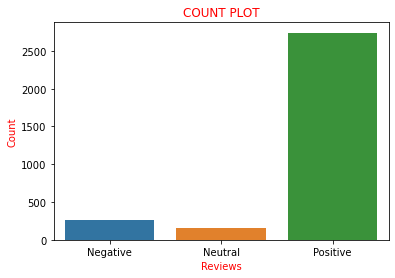

In [98]:
sns.countplot(a)
plt.xlabel('Reviews', color = 'red')
plt.ylabel('Count', color = 'red')
plt.xticks([0,1,2],['Negative','Neutral','Positive'])
plt.title('COUNT PLOT', color = 'r')
plt.show()

In [99]:
data['reviews']=a
#data
final_dataset = data[['reviews','verified_reviews']]
final_dataset

,reviews,verified_reviews
0,2,Love my Echo!
1,2,Loved it!
2,2,"Sometimes while playing a game, you can answer..."
3,2,I have had a lot of fun with this thing. My 4 ...
4,2,Music
...,...,...
3145,2,"Perfect for kids, adults and everyone in betwe..."
3146,2,"Listening to music, searching locations, check..."
3147,2,"I do love these things, i have them running my..."
3148,2,Only complaint I have is that the sound qualit...


In [100]:
data_p=final_dataset[data['reviews']==2]
data_n=final_dataset[data['reviews']==0]
len(data_p), len(data_n)

(2741, 257)

In [101]:
datap = data_p.iloc[np.random.randint(1,2741,100), :]
datan = data_n.iloc[np.random.randint(1, 257,100), :]
len(datan), len(datap)

(100, 100)

In [102]:
data = pd.concat([datap,datan])
len(data)

200

In [103]:
c=[]
for i in data['reviews']:
    if i==0:
        c.append(0)
    if i==2:
        c.append(1)
data['reviews']=c

C:\Users\imgro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


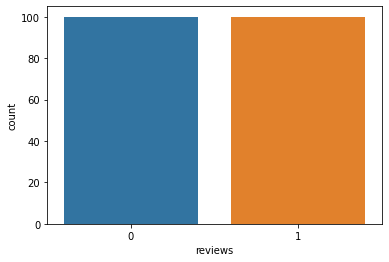

In [104]:
sns.countplot(data['reviews'])
plt.show()

In [105]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
data['review'] = data['verified_reviews'].apply(strip_html)

data=data.drop('verified_reviews',axis=1)

data.head()

,reviews,review
977,1,Nice product A+
3058,1,I'm obsessed with Alexa. She tells me the weat...
35,1,I bought this to compare the speaker quality t...
206,1,We are still discovering all that the Echo can...
1859,1,Great product and fast shipping. Thank you


### MODEL BUILDING

In [106]:
import nltk  #Natural Language Processing Toolkit
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
data['review'] = data['review'].apply(punc_clean)
data.head(20)

,reviews,review
977,1,Nice product A
3058,1,Im obsessed with Alexa She tells me the weathe...
35,1,I bought this to compare the speaker quality t...
206,1,We are still discovering all that the Echo can do
1859,1,Great product and fast shipping Thank you
2750,1,these are additional alexa based devices to ma...
2677,1,Small convenient and dependable This dot is a ...
2502,1,What can I say Well I’m a paranoid IT person ...
1791,1,This is very hard to review because I am part ...
710,1,I love it wife hates it


In [107]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
data['review'] = data['review'].apply(remove_stopword)

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(data['review'])

vect_X = vectr.transform(data['review'])

In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

clf=model.fit(vect_X,data['reviews'])
clf.score(vect_X,data['reviews'])*100

99.5

### PREDICTION

In [110]:
clf.predict(vectr.transform(["Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?"]))

array([0], dtype=int64)

In [111]:
clf.predict(vectr.transform(["Easy to set up."]))

array([1], dtype=int64)